In [90]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Procesamiento de datos

In [91]:
input_file = "./UCL-data/processed.cleveland.csv"
df = pd.read_csv(input_file, header=0)
df.head()

,age,sex,cp,trestbps,chol,fbs,resteg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


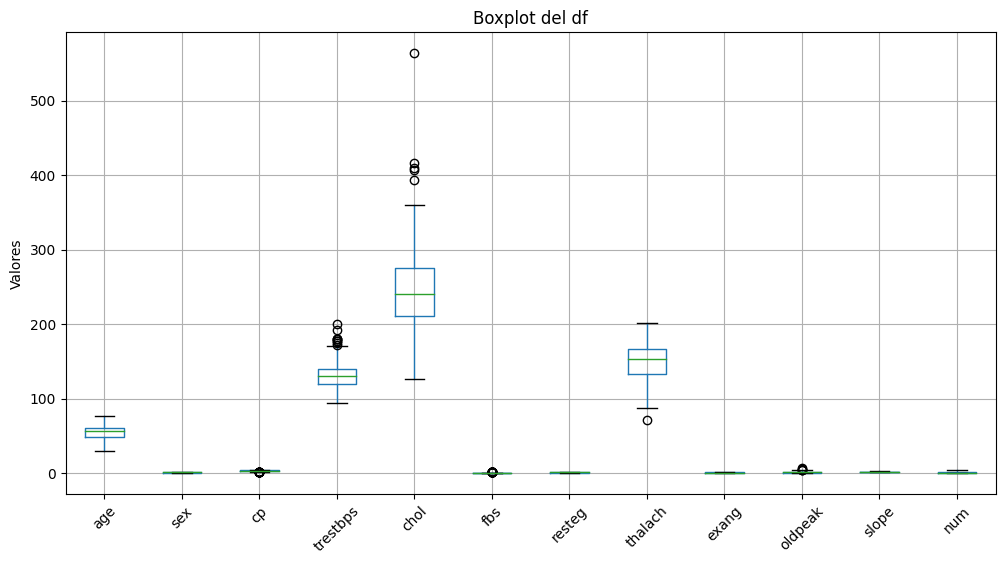

In [92]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Boxplot del df')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

In [93]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,resteg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [94]:
df = df[df['chol'] <= 400]
df

,age,sex,cp,trestbps,chol,fbs,resteg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [95]:
df = df[~df.isin(['?']).any(axis=1)]
df

,age,sex,cp,trestbps,chol,fbs,resteg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [96]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,resteg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.076079,0.109653,0.292814,0.171477,0.128262,0.139340,-0.401666,0.105244,0.190968,0.159520,0.363462,0.122062,0.225007
sex,-0.076079,1.000000,0.016192,-0.064091,-0.140070,0.045910,0.055023,-0.056468,0.143256,0.127233,0.038760,0.112553,0.405795,0.242429
cp,0.109653,0.016192,1.000000,-0.040933,0.067130,-0.054886,0.059587,-0.340623,0.377839,0.196677,0.148035,0.227943,0.264627,0.400086
trestbps,0.292814,-0.064091,-0.040933,1.000000,0.152600,0.179936,0.148447,-0.049071,0.068033,0.186906,0.123136,0.087488,0.140389,0.152028
chol,0.171477,-0.140070,0.067130,0.152600,1.000000,0.003195,0.127731,-0.017437,0.084271,-0.003477,-0.028887,0.099266,-0.032480,0.064313
fbs,0.128262,0.045910,-0.054886,0.179936,0.003195,1.000000,0.065879,-0.009692,0.004958,0.015574,0.059336,0.157650,0.075815,0.060322
resteg,0.139340,0.055023,0.059587,0.148447,0.127731,0.065879,1.000000,-0.076270,0.085225,0.103635,0.133271,0.119519,0.009902,0.181673
thalach,-0.401666,-0.056468,-0.340623,-0.049071,-0.017437,-0.009692,-0.076270,1.000000,-0.384683,-0.354383,-0.391377,-0.273982,-0.279006,-0.426378
exang,0.105244,0.143256,0.377839,0.068033,0.084271,0.004958,0.085225,-0.384683,1.000000,0.297736,0.250609,0.149471,0.329375,0.397462
oldpeak,0.190968,0.127233,0.196677,0.186906,-0.003477,0.015574,0.103635,-0.354383,0.297736,1.000000,0.579431,0.278680,0.336414,0.491494


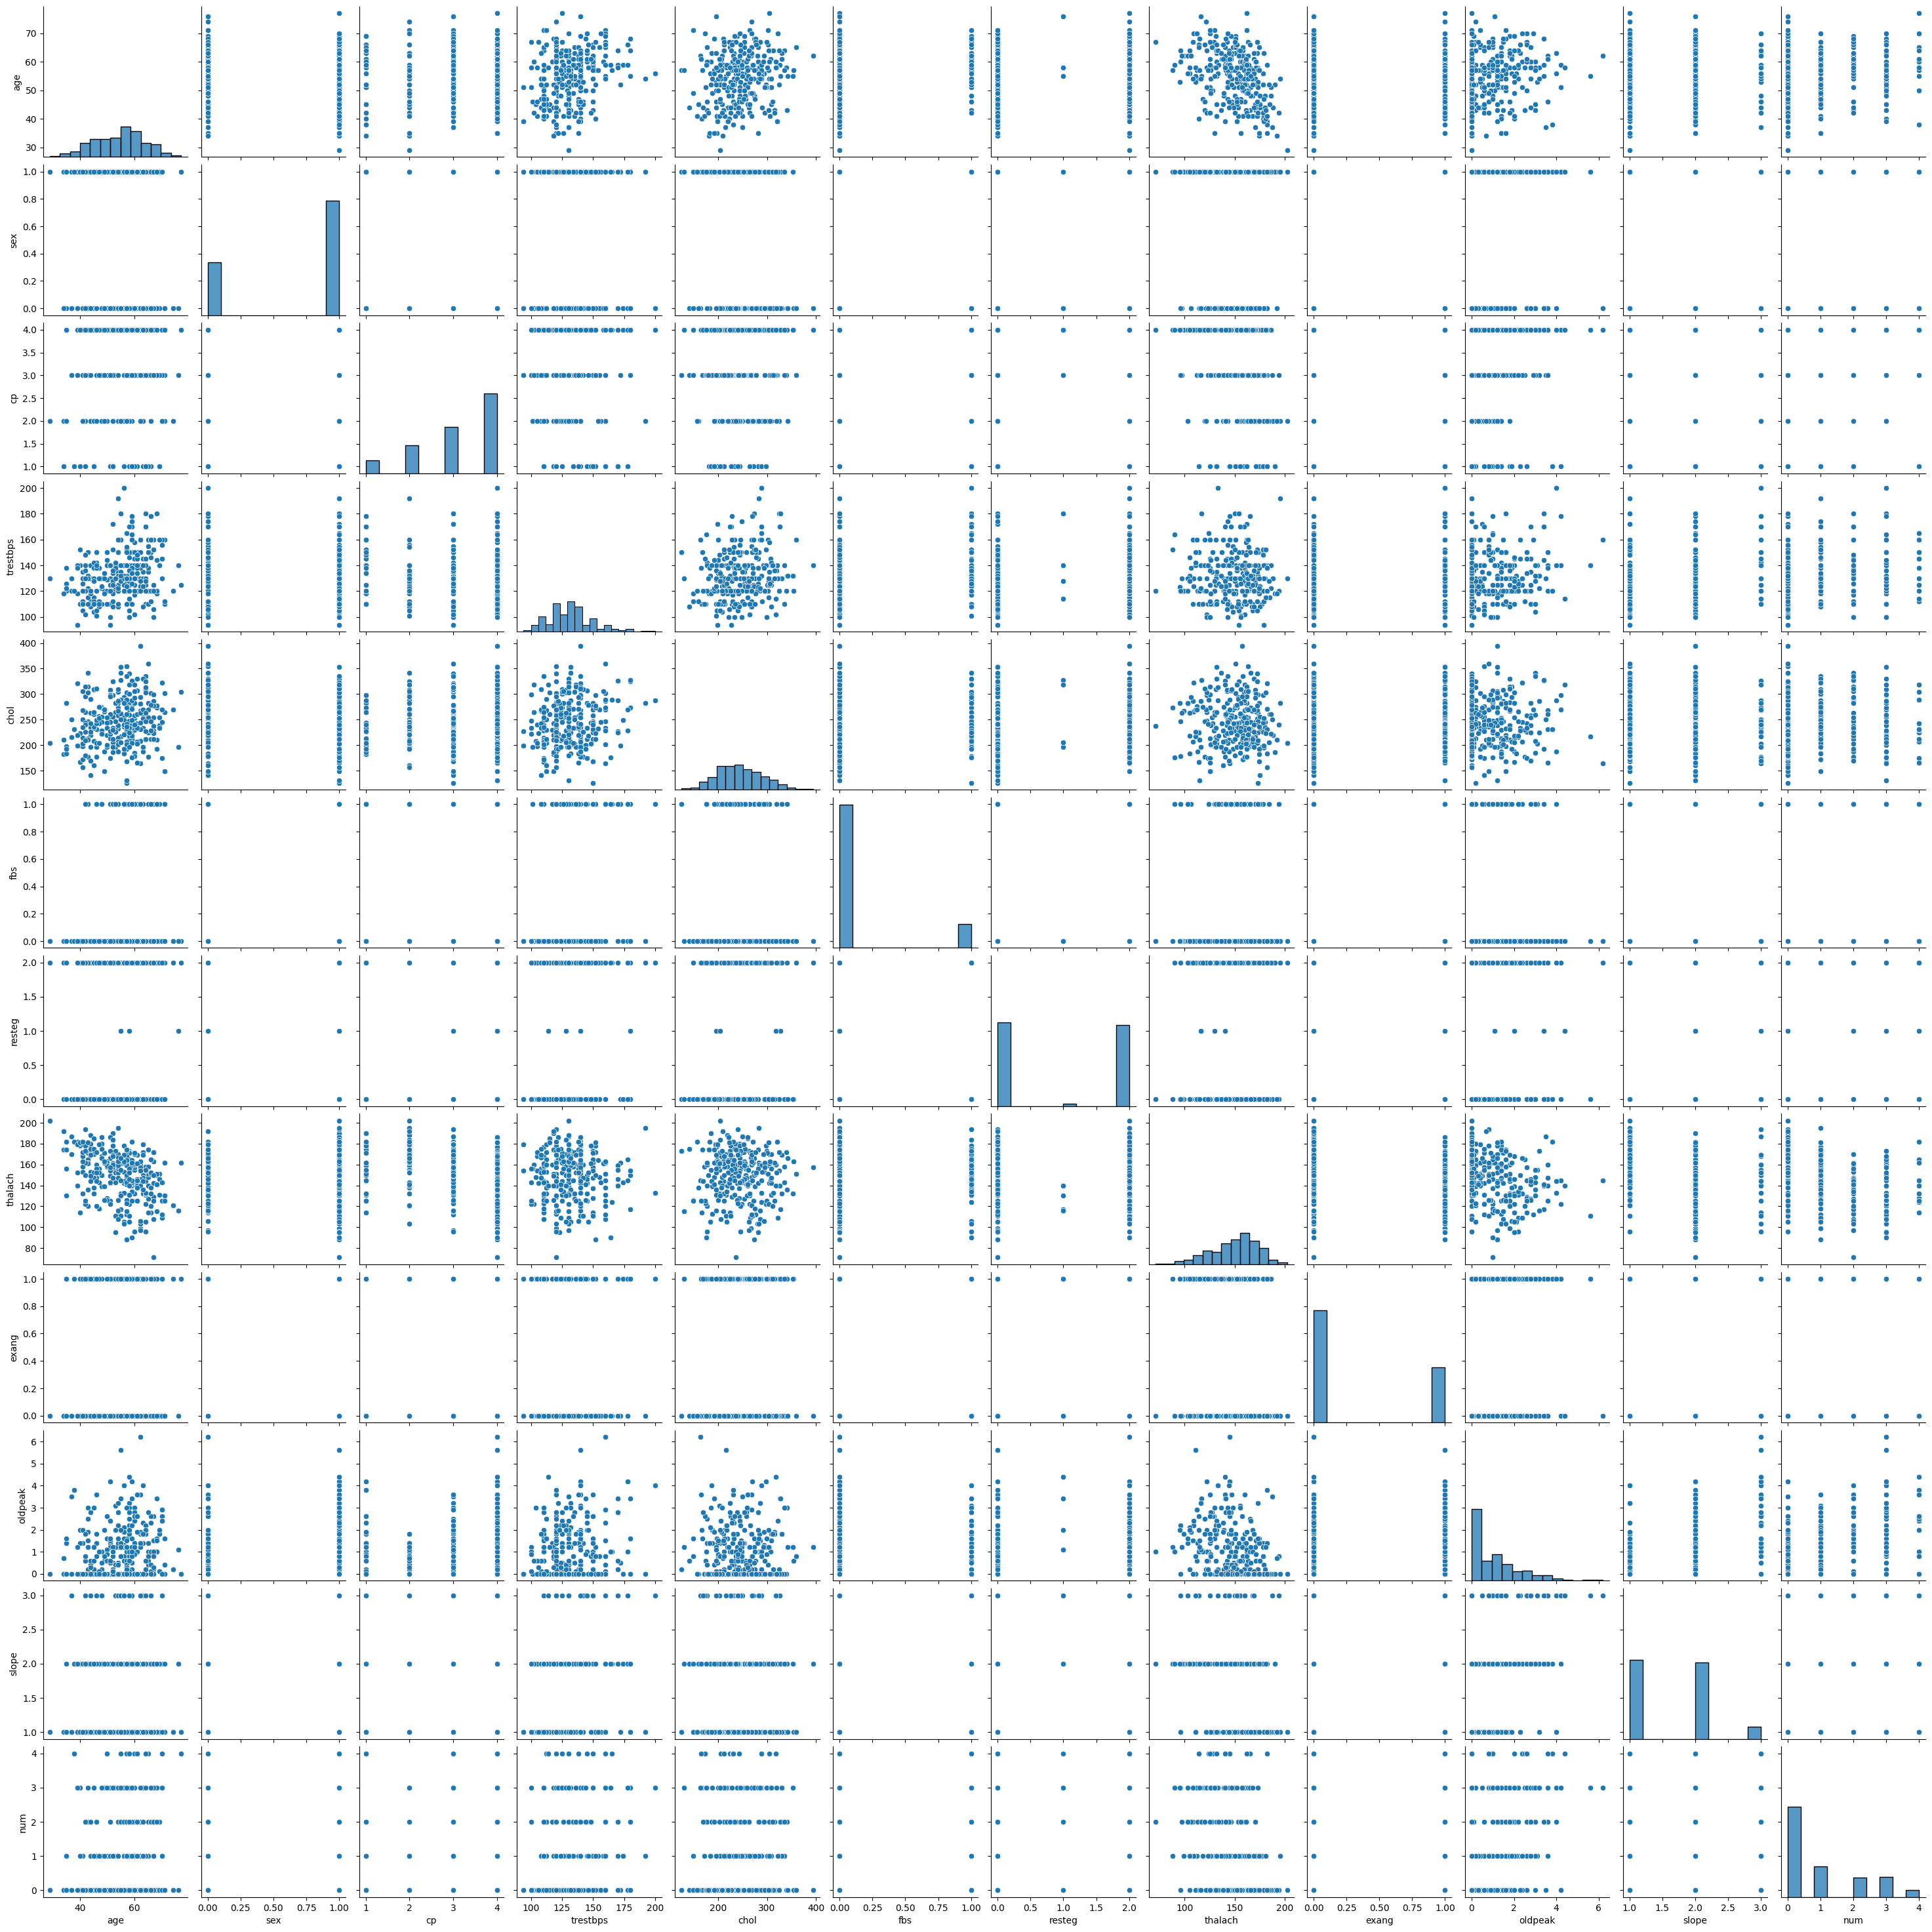

In [97]:
sns.pairplot(df)

In [98]:
def convert_num(value):
    return 0 if value == 0 else 1

df4clases = pd.DataFrame(df)

df['num_label'] = df['num'].apply(convert_num)
df.drop('num', axis=1, inplace=True)

df

,age,sex,cp,trestbps,chol,fbs,resteg,thalach,exang,oldpeak,slope,ca,thal,num_label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [99]:
df['num_label'] = df['num_label'].astype('category')

In [100]:
X = df.loc[:, df.columns != 'num_label']
X

,age,sex,cp,trestbps,chol,fbs,resteg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [101]:
Y = df['num_label'].values
Y

[0, 1, 1, 0, 0, ..., 1, 1, 1, 1, 1]
Length: 293
Categories (2, int64): [0, 1]

# Parte 2: Entrenamiento y Testing

In [102]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.30, random_state=
0, shuffle=True)

# Parte 3: Modelo
## Clasificacion binaria (2 clases)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

### Regresion Logistica

In [104]:
lr = LogisticRegression(penalty='l2', max_iter=1000)
parameters_lr = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                        "max_iter": [50, 100, 200], "warm_start": [True, False]}

grid_logreg = GridSearchCV(lr, parameters_lr, scoring=make_scorer(accuracy_score))
grid_logreg.fit(train_X, train_y)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(train_X, train_y)
pred_logreg = logreg_clf.predict(test_X)
acc_logreg = accuracy_score(test_y, pred_logreg)

print("The Score for Logistic Regression is: " + str(acc_logreg))


The Score for Logistic Regression is: 0.8636363636363636


### Naive Bayes

In [105]:
gnb_clf = GaussianNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(gnb_clf, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(train_X, train_y)

gnb_clf = grid_gnb.best_estimator_

gnb_clf.fit(train_X, train_y)
pred_gnb = gnb_clf.predict(test_X)
acc_gnb = accuracy_score(test_y, pred_gnb)

print("The Score for Gaussian NB is: " + str(acc_gnb))

The Score for Gaussian NB is: 0.8522727272727273


In [106]:
berno_nb = BernoulliNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(berno_nb, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(train_X, train_y)

berno_nb = grid_gnb.best_estimator_

berno_nb.fit(train_X, train_y)
pred_gnb = berno_nb.predict(test_X)
acc_bernonb = accuracy_score(test_y, pred_gnb)

print("The Score for Gaussian NB is: " + str(acc_bernonb))

The Score for Gaussian NB is: 0.8181818181818182


### Knn

In [107]:
knn = KNeighborsClassifier()

parameters_knn = {"n_neighbors": [3, 5, 10, 15], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree"],
                  "leaf_size": [20, 30, 50]}

grid_knn = GridSearchCV(knn, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(train_X, train_y)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(train_X, train_y)
pred_knn = knn_clf.predict(test_X)
acc_knn = accuracy_score(test_y, pred_knn)

print("The Score for KNeighbors is: " + str(acc_knn))

The Score for KNeighbors is: 0.6136363636363636


### LDA

In [108]:
lda = LinearDiscriminantAnalysis()

parameters_lda = {}

grid_lda = GridSearchCV(lda, parameters_lda, scoring=make_scorer(accuracy_score))
grid_lda.fit(train_X, train_y)

lda_clf = grid_lda.best_estimator_

lda_clf.fit(train_X, train_y)
pred_lda = lda_clf.predict(test_X)
acc_lda = accuracy_score(test_y, pred_lda)

print("The Score for lda is: " + str(acc_lda))

The Score for lda is: 0.875


## Clasificacion con 4 clases

In [109]:
df4clases

,age,sex,cp,trestbps,chol,fbs,resteg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [110]:
df4clases['num'] = df4clases['num'].astype('category')

X = df4clases.loc[:, df4clases.columns != 'num']
Y = df4clases['num'].values
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.30, random_state=
0, shuffle=True)

### Naive Bayes

In [111]:
gnb_clf = GaussianNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(gnb_clf, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(train_X, train_y)

gnb_clf = grid_gnb.best_estimator_

gnb_clf.fit(train_X, train_y)
pred_gnb = gnb_clf.predict(test_X)
acc_gnb2 = accuracy_score(test_y, pred_gnb)

print("The Score for Gaussian NB is: " + str(acc_gnb2))

The Score for Gaussian NB is: 0.5795454545454546


In [112]:
multNB_clf = MultinomialNB()

parameters_multNN = {}

grid_multNB = GridSearchCV(multNB_clf, parameters_multNN, scoring=make_scorer(accuracy_score))
grid_multNB.fit(train_X,train_y)

multNB_clf = grid_multNB.best_estimator_

multNB_clf.fit(train_X,train_y)
pred_multNB = multNB_clf.predict(test_X)
acc_multNB = accuracy_score(test_y, pred_multNB)

### Knn


In [113]:
knn = KNeighborsClassifier()

parameters_knn = {"n_neighbors": [3, 5, 10, 15], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree"],
                  "leaf_size": [20, 30, 50]}

grid_knn = GridSearchCV(knn, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(train_X, train_y)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(train_X, train_y)
pred_knn = knn_clf.predict(test_X)
acc_knn2 = accuracy_score(test_y, pred_knn)

print("The Score for KNeighbors is: " + str(acc_knn2))

The Score for KNeighbors is: 0.5340909090909091


### LDA

In [114]:
lda = LinearDiscriminantAnalysis()

parameters_lda = {}

grid_lda = GridSearchCV(lda, parameters_lda, scoring=make_scorer(accuracy_score))
grid_lda.fit(train_X, train_y)

lda_clf = grid_lda.best_estimator_

lda_clf.fit(train_X, train_y)
pred_lda = lda_clf.predict(test_X)
acc_lda2 = accuracy_score(test_y, pred_lda)

print("The Score for lda is: " + str(acc_lda2))

The Score for lda is: 0.5909090909090909


# Evaluacion

In [115]:
model_performance = pd.DataFrame({
    "Model": ["Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "LDA", "Bernouli NB"],
    "Accuracy": [acc_logreg, acc_knn, acc_gnb, acc_lda, acc_bernonb]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
3,LDA,0.875000
0,Logistic Regression,0.863636
2,Gaussian Naive Bayes,0.852273
4,Bernouli NB,0.818182
1,K Nearest Neighbors,0.613636


In [116]:
model_performance = pd.DataFrame({
    "Model": ["K Nearest Neighbors", "Gaussian Naive Bayes",  
              "LDA","Multinomial NB"],
    "Accuracy": [acc_knn2, acc_gnb2, acc_lda2, acc_multNB]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,LDA,0.590909
1,Gaussian Naive Bayes,0.579545
0,K Nearest Neighbors,0.534091
3,Multinomial NB,0.454545
